In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import evogrowthpy as evgr

In [2]:
Om_m=0.3
h=0.7
z=1
w0=-0.95
wa=0.1
xi=10

# Normalising to LCDM at z=0
D_norm_lcdm=evgr.get_growth_wrap(Om_m,h,[0.0,-1.0,0.0,0.0])[0]

# Compute growth quantities
D, f = evgr.get_growth_wrap(Om_m,h,[z,w0,wa,xi])/[D_norm_lcdm,1]

print(D,f)

0.5961134490294779 0.8410885360830633


In [3]:
# Test with higher accuracy

# Normalising to LCDM at z=0
D_norm_lcdm=evgr.get_growth_wrap(Om_m,h,[0.0,-1.0,0.0,0.0],accuracy=1e-5)[0]

# Compute growth quantities
D, f = evgr.get_growth_wrap(Om_m,h,[z,w0,wa,xi],accuracy=1e-5)/[D_norm_lcdm,1]

print(D,f)

0.5961135716252314 0.8410884968315572


In [4]:
# Case with neutrino mass (for small-scale growth)

m_nu = 0.2

Om_nu = 0.0107*m_nu / h**2

# Normalising to nuLCDM at z=0
D_norm_lcdm=evgr.get_growth_wrap(Om_m,h,[0.0,-1.0,0.0,0.0],om_cb = Om_m-Om_nu)[0]

D_nu, f_nu = evgr.get_growth_wrap(Om_m,h,[z,w0,wa,xi],om_cb = Om_m-Om_nu)/[D_norm_lcdm,1]

print(D_nu, f_nu)

0.5988140803007801 0.8336286421815626


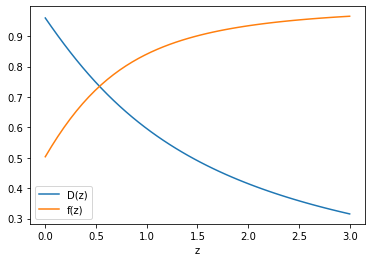

In [5]:
# Evolution with redshift

# Normalising to LCDM at z=0
D_norm_lcdm=evgr.get_growth_wrap(Om_m,h,[0.0,-1.0,0.0,0.0])[0]

# Compute growth quantities
z_arr = np.linspace(0,3,50)

Df_arr = np.asarray([evgr.get_growth_wrap(Om_m,h,[zi,w0,wa,xi])/[D_norm_lcdm,1] for zi in z_arr])

plt.plot(z_arr,Df_arr[:,0],label='D(z)')
plt.plot(z_arr,Df_arr[:,1],label='f(z)')

plt.xlabel('z')
plt.legend()